In [91]:
import importer
import numpy as np
import matplotlib.pyplot as plt
import torch as t
import random

## Pre-processing

In the interest of brevity, all pre-processing for this dataset has been done in the importer module inside this repository. This module servers a few purposes:
- Removes all rows where there is a column containing no data.
- Allows partitioning of data
- Converts the 'Activity Date' field into the seconds from the Unix epoch

In [92]:
data_set = importer.Data()

# Get all headers that contain numeric data
headers = []
for i in range(len(data_set.headers)):
    if data_set.types[i] != 'string' and data_set.types[i] != 'bool':
        headers.append(data_set.headers[i])

# Remove headers which have not been recorded for many activities
for header in headers:
    if len(data_set.get_data([header])[header]) < 100:
        headers.remove(header)

headers.append('Activity Gear')
# Manually select headers for debugging
#headers = ['Average Speed', 'Average Watts', 'Activity Gear']

features = data_set.get_data(headers)
print('This leaves us with the following list of', len(headers), 'headers: ', headers, '\n')
print('This reduces the number of activities to ', len(features[headers[0]]))

X, Y = importer.separate_x_y(features, 'Activity Gear')

This leaves us with the following list of 40 headers:  ['Activity ID', 'Elapsed Time', 'Distance', 'Elapsed Time2', 'Moving Time', 'Distance3', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Average Watts', 'Calories', 'Perceived Exertion', 'Perceived Relative Effort', 'From Upload', 'Weather Observation Time', 'Weather Condition', 'Weather Temperature', 'Apparent Temperature', 'Dewpoint', 'Humidity', 'Weather Pressure', 'Wind Speed', 'Wind Gust', 'Wind Bearing', 'Precipitation Intensity', 'Sunrise Time', 'Sunset Time', 'Moon Phase', 'Precipitation Probability', 'Precipitation Type', 'Cloud Cover', 'Weather Visibility', 'UV Index', 'Weather Ozone', 'Activity Gear'] 

This reduces the number of activities to  79


## K-means Clustering

Clustering takes features of the data an aims to find K clusters based on their means.

Before defining the algorithm, some definitions are required first:

$$\textbf{\mu}=vector\ of\ cluster\ means\ for\ each\ cluster$$

$$z_i =\ integer\ cluster\ index\ for\ each\ datapoint,\ indexed\ i$$

$$Objection\ Function:\ \mathcal{L}(\sum_i||x_i-\mu_z||^2)$$

### Method

1. Assign each datapoint to the nearest cluster
2. Move the cluster centers to the mean of the assigned datapoints

In [93]:
clusters = 2

mu = [np.array([random.uniform(min(X.T[i]), max(X.T[i])) for i in range(len(X[0]))]) for j in range(clusters)]
assignments = []

for i in range(1000):
    # Assign each datapoint to the nearest cluster center
    if i % 2 == 0:
        assignments = []
        for datapoint in range(len(X)):
            distances = [np.linalg.norm(X[datapoint] - mu[cluster]) for cluster in range(clusters)]
            assignments.append(np.argmin(distances))
        print('Assignments are:', assignments)
    # Move each cluster center to the mean of all assigned datapoints
    else:
        for cluster in range(clusters):
            assignedTo = []
            for j in range(len(X)):
                if assignments[j] == cluster:
                    assignedTo.append(X[j])
            assignedTo = np.array(assignedTo)
            print(len(assignedTo))
            #assignedTo = np.array([X.T[j] for j in range(len(X.T)) if assignments[j] == 1]).T
            print(np.mean(assignedTo, 0))
            mu[cluster] = np.mean(assignedTo, 0)
            #mu should be the length of features
        print(mu)

Assignments are: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
11
[ 3.34044002e+09  5.49081818e+03  2.21818182e+01  5.49081818e+03
  5.05545455e+03  2.21843635e+04  1.22181820e+01  4.49088140e+00
  4.36643488e+02  4.24316542e+02  1.36354548e+02  4.30709093e+02
  2.62272726e+01  1.04059510e-01  1.66873345e+02  9.26274875e+02
  6.18181818e+00  1.55272727e+02  1.00000000e+00  1.58755449e+09
  2.18181818e+00  1.19163636e+01  1.11127273e+01  4.82090905e+00
  6.25454545e-01  1.02207272e+03  3.91454549e+00  5.36727272e+00
  1.35090909e+02  0.00000000e+00  1.58753121e+09  1.58758343e+09
  5.48181818e-01  0.00000000e+00 -1.00000000e+00  6.34545450e-01
  1.60930000e+04  3.00000000e+00  3.41418182e+02]
68
[ 5.17557812e+09  8.46036765e+03  3.45735294e+01  8.46036765e+03
  7.01035294e+03  3.45768920e+04  1.329

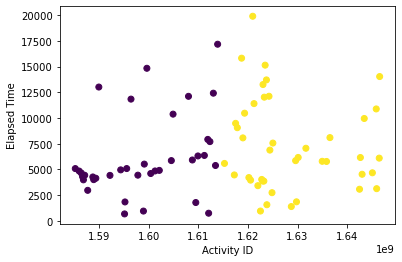

In [98]:
feature1 = 0
feature2 = 1

fig, ax = plt.subplots()
ax.set_xlabel(headers[feature1])
ax.set_ylabel(headers[feature2])
ax.scatter(X.T[30], X.T[4], c=assignments)

plt.show()